<a href="https://colab.research.google.com/github/ChaitanyaSannidhi/ButterflyClassification/blob/main/ButterflyClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Sequential
from keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d phucthaiv02/butterfly-image-classification

Dataset URL: https://www.kaggle.com/datasets/phucthaiv02/butterfly-image-classification
License(s): CC0-1.0
 77% 174M/226M [00:00<00:00, 887MB/s] 
100% 226M/226M [00:00<00:00, 639MB/s]


In [ ]:
!unzip -q /content/butterfly-image-classification.zip -d /content/butterfly_dataset/


replace /content/butterfly_dataset/Testing_set.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

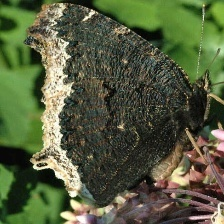

In [ ]:
import random
from IPython.display import Image, display

# Specify the path to your image folder
folder_path = '/content/butterfly_dataset/test'

# list all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
# Select a random image from the list
selected_image = random.choice(image_files)

# Display the randomly selected image
image_path = os.path.join(folder_path, selected_image)
display(Image(filename=image_path))

In [ ]:
trainpath = "/content/butterfly_dataset/train"
testpath = "/content/butterfly_dataset/test"

train_datagen = ImageDataGenerator(rescale = 1./255,zoom_range = 0.2,shear_range= 0.2)
test_datagen = ImageDataGenerator(rescale = 1./255)

train = train_datagen.flow_from_directory(trainpath, target_size=(224, 224), batch_size=20)
test = test_datagen.flow_from_directory(testpath, target_size=(224, 224), batch_size=20)

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

# Load the CSVs
train_df = pd.read_csv('/content/butterfly_dataset/Training_set.csv')
test_df = pd.read_csv('/content/butterfly_dataset/Testing_set.csv')

# Update with full image paths
train_df['filename'] = '/content/butterfly_dataset/train/' + train_df['filename']
test_df['filename'] = '/content/butterfly_dataset/test/' + test_df['filename']

# ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.2,
                                   shear_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow from DataFrame
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='filename',
    y_col='label',
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical',
    subset='training',
    shuffle=True)

val_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='filename',
    y_col='label',
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical',
    subset='validation',
    shuffle=True)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='filename',
    y_col=None,  # No labels for test
    target_size=(224, 224),
    batch_size=20,
    class_mode=None,
    shuffle=False)
y

Found 5200 validated image filenames belonging to 75 classes.
Found 1299 validated image filenames belonging to 75 classes.
Found 2786 validated image filenames.


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model


In [ ]:
vgg = VGG16(include_top = False, input_shape = (224,224,3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
for layer in vgg.layers:
    print(layer)

<InputLayer name=input_layer, built=True>
<Conv2D name=block1_conv1, built=True>
<Conv2D name=block1_conv2, built=True>
<MaxPooling2D name=block1_pool, built=True>
<Conv2D name=block2_conv1, built=True>
<Conv2D name=block2_conv2, built=True>
<MaxPooling2D name=block2_pool, built=True>
<Conv2D name=block3_conv1, built=True>
<Conv2D name=block3_conv2, built=True>
<Conv2D name=block3_conv3, built=True>
<MaxPooling2D name=block3_pool, built=True>
<Conv2D name=block4_conv1, built=True>
<Conv2D name=block4_conv2, built=True>
<Conv2D name=block4_conv3, built=True>
<MaxPooling2D name=block4_pool, built=True>
<Conv2D name=block5_conv1, built=True>
<Conv2D name=block5_conv2, built=True>
<Conv2D name=block5_conv3, built=True>
<MaxPooling2D name=block5_pool, built=True>


In [ ]:
len(vgg.layers)

19

In [ ]:
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
x = Flatten()(vgg.output)


In [ ]:
output = Dense(38, activation = 'softmax')(x)

In [ ]:
vgg16 = Model(vgg.input,output)

In [ ]:
vgg16.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 38)             │       953,382 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,668,070 (59.77 MB)

 Trainable params: 953,382 (3.64 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
img_path = '/content/butterfly_dataset/train/Image_1565.jpg'


In [ ]:
import numpy as np
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = preprocess_input(x)
preds = vgg16.predict(np.array([x]))
preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


array([[8.3218962e-35, 1.8009331e-18, 6.8599811e-23, 4.9515978e-19,
        5.1897207e-13, 3.6125144e-24, 9.2853944e-31, 2.7140296e-18,
        8.5976355e-34, 6.1905189e-19, 1.3382400e-42, 3.4578172e-25,
        1.3413246e-33, 2.4965114e-37, 1.3778338e-19, 4.3026108e-28,
        5.5871193e-13, 1.3445757e-21, 1.0000000e+00, 5.7120373e-39,
        1.5309158e-28, 8.1055307e-41, 3.7856735e-20, 2.1300376e-19,
        3.9017067e-26, 7.6810016e-37, 6.1691856e-26, 2.2420518e-24,
        3.3025130e-10, 8.2780233e-25, 6.2561536e-21, 5.9015742e-22,
        6.8883769e-40, 2.2876314e-33, 6.1012912e-26, 5.0563334e-34,
        5.1591087e-27, 1.2401301e-25]], dtype=float32)

In [ ]:
from keras.preprocessing import image
import numpy as np

In [ ]:
img_path = '/content/butterfly_dataset/train/Image_1038.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

In [ ]:
predictions = vgg16.predict(img_array)
predicted_class_index = np.argmax(predictions, axis=1)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [ ]:
img_path = '/content/butterfly_dataset/train/Image_1038.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # Normalize
image_batch = np.expand_dims(img_array, axis=0)  # Only expand once!

# Make predictions
predictions = vgg16.predict(image_batch)

# Interpret prediction
predicted_class_index = np.argmax(predictions[0])
class_indices = train_generator.class_indices
labels = {v: k for k, v in class_indices.items()}
predicted_class_name = labels[predicted_class_index]

print("Predicted species:", predicted_class_name)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted species: ADONIS


In [ ]:
vgg16.save('vgg16_model.h5')